<a href="https://colab.research.google.com/github/Ali-mohammadi-design/Prompt_Engineering_and_Machine_Learning/blob/main/Prompt_engineering_AWS_Bedrock_Prompt_to_image_Stability_Model_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To get more information about AI image difusion you can see this page: Stability.ai Diffusion models with this link:
https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-stability-diffusion.html

In summary, in generating image based on prompts we have to know about the following parameters:


1-weight: you can decide the prompt is positive or negative. the default is 1 which is a positive. -1 is would transfer this meaning to the LLM that this is a negative prompt.

2-height and width: could be set. The value should be mathced up with the one of the value available in the documentation.

3-sampler: The model would use defusion process with some sampler. We can change the sampler whenever it is required.

4-steps: this is the number of generation steps that shows how many times you can sample this image. With more steps you would have more accurate results.

5-style-preset: would determine the style/

6-seed: would affect on the randomness of generating the picture. if you set the seed in a regular number each time you would get an almost fixed picture

7-cfg_scale: the determine how much the final image is in line with the prompt. The lower number would increase the randomness.

In [1]:
! pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.5 MB/s eta 0:00:00


In [2]:
import boto3
s3=boto3.resource('s3')

In [5]:
import os
aws_access_key_id=os.environ['aws_access_key_id']
aws_secret_access_key=os.environ['aws_secret_access_key']

In [6]:
s3.buckets.all()

s3.bucketsCollection(s3.ServiceResource(), s3.Bucket)

In [7]:
s3 = boto3.resource('s3',
         aws_access_key_id=aws_access_key_id,
         aws_secret_access_key= aws_secret_access_key)

In [8]:
bedrock_runtime= boto3.client(aws_access_key_id=aws_access_key_id,aws_secret_access_key= aws_secret_access_key, service_name='bedrock-runtime', region_name='us-east-1')


In [134]:
pos_prompt='Please draw a kind and mature mother who is missing his dead boy'
neg_prompt='Ugly'

In [135]:
import json
parameters={'text_prompts':[{'text':pos_prompt, 'weight':1}, {'text':neg_prompt, 'weight':-1}], 'cfg_scale':35, 'seed':0, 'samples':1}
body=json.dumps(parameters)

In [136]:
response=bedrock_runtime.invoke_model(body=body, modelId='stability.stable-diffusion-xl-v1')

In [137]:
answer=response.get('body').read()

In [138]:
response_body=json.loads(answer)

In [139]:
response_body

{'result': 'success',
 'artifacts': [{'seed': 0,
   'base64': 'iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAIAAADwf7zUAAACVGVYSWZNTQAqAAAACAAGAQAABAAAAAEAAAQAAQEABAAAAAEAAAQAAQ4AAgAAAEEAAABWARAAAgAAABQAAACYATEAAgAAAA0AAACskhMAAQAAAZoAAAC6AAAAAFBsZWFzZSBkcmF3IGEga2luZCBhbmQgbWF0dXJlIG1vdGhlciB3aG8gaXMgbWlzc2luZyBoaXMgZGVhZCBib3kAAHN0YWJpbGl0eS1kaWZmdXNpb24Ac3RhYmlsaXR5LmFpAAA3WSs/KzBzdyNCMDA0S2w4TTBKeDFxN00tMCQyYncudjNYTTV0cGZNMCQtbEgzaUg+Mjd5eWxRTmZpPDA1eUNDNzAkOi1sM2lIPEYxeyRDekwofUFANXpbeGswJFpVMjNpSDxLNjorM08hZDgvKjVEdnAtNSkzLWVCOCZ7UEE6eytoQWJXRUtBOnsrbndPIzcxdnJ1QmR1VlAhMEM0Q1hFeT9XdWlCOTcmMXk/bCU6eD55JDFCN11NZ2ZscWV6Zmxxa3p2Ui9RPXovUHp4emVTJWN5P21WdkJ6PkBhekZzQWRBVzJNaTFSPzFxRndpMXEzaVF9dEZERGtZNXpdWFYxcTdQOjAkW1YqQi1STlJCOD4renZxe2ZzQjg+K3p4alUlKEE6OjZkQTpKKTBBPSMybWZrTHVpZmxxa3p2Ui9RLnduYlQvQi1Sbm56emM2S3Y+UltCdnBCNDp2QER5MGZrVVNyQi4+U2dmbHpiRndPI2pkd1B4bXI4dXgqWDB3VFlaMiU1TGUzak0kbkZpTFE9MDFxZ2owMDAwMK8PcQoAAQAASURBVHic1P13nB3JdSaIfudEZOY15VAGZeC9aaDRaIP2RDuyu9lseiM6UW6kHWk0I42f2bdvZnZ33

Note: As is clear in this stage the response is binary code so we have to make a picture out of this binary code.

In [140]:
import PIL

In [141]:
import base64

In [142]:
from PIL import Image

In [143]:
base_64_image=base64.b64decode(response_body['artifacts'][0]['base64'])

In [144]:
file_path='my_mother.png'
with open(file_path, 'wb') as file:
  file.write(base_64_image)

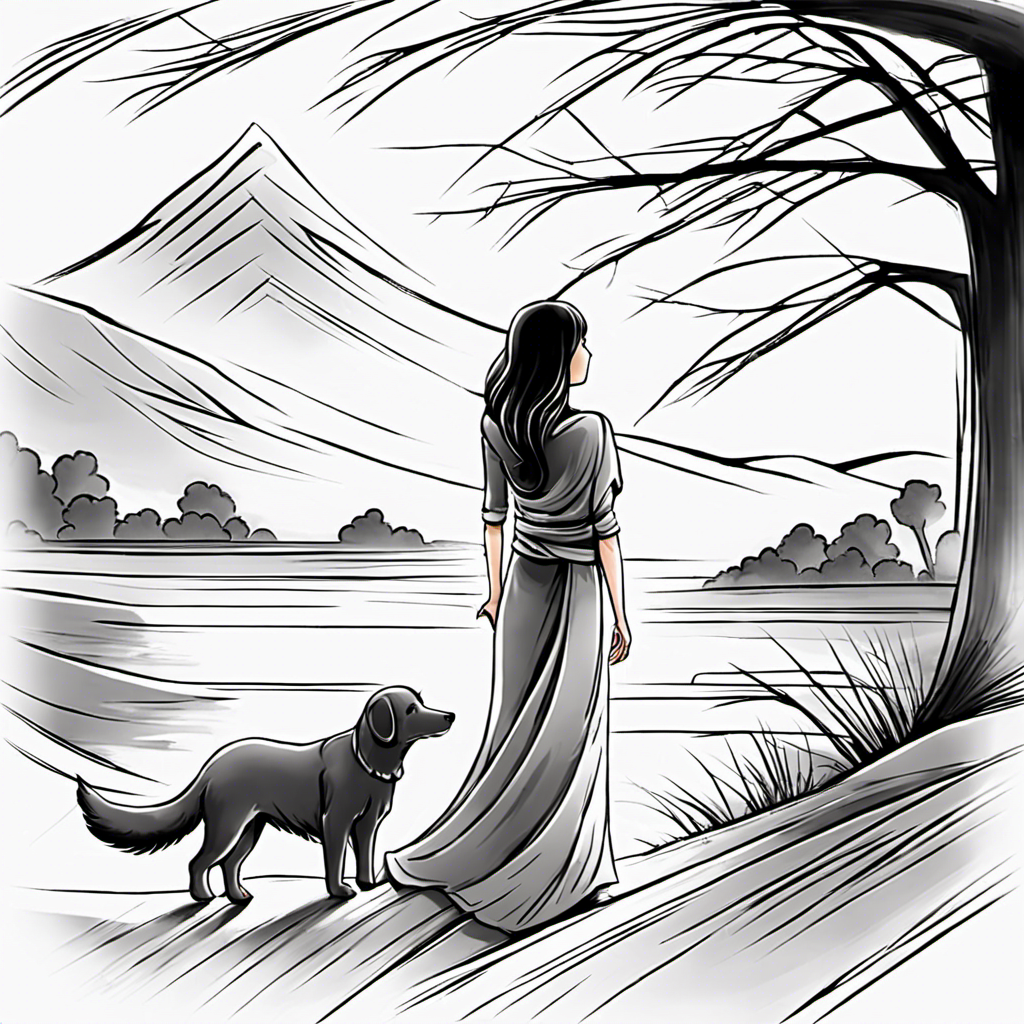

In [145]:
Image.open('/content/my_mother.png')